In [2]:
from pathlib import Path
from langchain.document_loaders import Docx2txtLoader
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv
import chromadb
from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
)  # recommended text splitter by langchainfrom langchain.chains import RetrievalQA
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains.llm import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.chains.mapreduce import MapReduceChain
from langchain.text_splitter import CharacterTextSplitter
from langchain.chains import ReduceDocumentsChain, MapReduceDocumentsChain

In [4]:
load_dotenv()

True

# Load Documents

In [5]:
DATA_DIR = Path("data", "raw")
toc_2015_fname = Path(DATA_DIR, "Jan 2015.docx")
toc_2023_fname = Path(DATA_DIR, "Mar 2023.docx")
toc_2015_fname_reduced = Path("data", "reduced", "Jan 2015_reduced.docx")

In [6]:
loader_2015 = Docx2txtLoader(str(toc_2015_fname))  # str reqd for loader
data_2015 = loader_2015.load()
data_2015

[Document(page_content='TERMS AND CONDITIONS\n\nA. ITUNES STORE, MAC APP STORE, APP STORE, AND IBOOKS STORE TERMS OF SALE\nB. ITUNES STORE TERMS AND CONDITIONS\nC. MAC APP STORE, APP STORE AND IBOOKS STORE TERMS AND CONDITIONS\n\n\nTHE LEGAL AGREEMENTS SET OUT BELOW ARE BETWEEN YOU AND ITUNES SARL (“ITUNES") AND GOVERN YOUR USE OF THE ITUNES STORE, MAC APP STORE, APP STORE AND IBOOKS STORE (THE “STORES”). TO AGREE TO THESE TERMS, CLICK "AGREE." IF YOU DO NOT AGREE TO THESE TERMS, DO NOT CLICK "AGREE," AND DO NOT USE THE ITUNES STORE, MAC APP STORE, APP STORE OR IBOOKS STORE. THIS AGREEMENT APPLIES WITHOUT PREJUDICE TO SOFTWARE LICENCES THAT YOU MAY HAVE ENTERED INTO, SUCH AS FOR THE USE OF THE ITUNES APPLICATION.\n\nFOR MORE INFORMATION ABOUT OUR PRODUCTS AND SERVICES, PLEASE VISIT http://www.apple.com/support/.\n\nA. ITUNES STORE, MAC APP STORE, APP STORE AND IBOOKS STORE TERMS OF SALE\n\nPAYMENTS, TAXES, AND REFUND POLICY\n\nYou agree that you will pay for all products you purchase t

In [7]:
loader_2015_reduced = Docx2txtLoader(str(toc_2015_fname_reduced))  # str reqd for loader
data_2015_reduced = loader_2015_reduced.load()
data_2015_reduced

[Document(page_content='TERMS AND CONDITIONS\n\nA. ITUNES STORE, MAC APP STORE, APP STORE, AND IBOOKS STORE TERMS OF SALE\nB. ITUNES STORE TERMS AND CONDITIONS\nC. MAC APP STORE, APP STORE AND IBOOKS STORE TERMS AND CONDITIONS\n\n\nTHE LEGAL AGREEMENTS SET OUT BELOW ARE BETWEEN YOU AND ITUNES SARL (“ITUNES") AND GOVERN YOUR USE OF THE ITUNES STORE, MAC APP STORE, APP STORE AND IBOOKS STORE (THE “STORES”). TO AGREE TO THESE TERMS, CLICK "AGREE." IF YOU DO NOT AGREE TO THESE TERMS, DO NOT CLICK "AGREE," AND DO NOT USE THE ITUNES STORE, MAC APP STORE, APP STORE OR IBOOKS STORE. THIS AGREEMENT APPLIES WITHOUT PREJUDICE TO SOFTWARE LICENCES THAT YOU MAY HAVE ENTERED INTO, SUCH AS FOR THE USE OF THE ITUNES APPLICATION.\n\nFOR MORE INFORMATION ABOUT OUR PRODUCTS AND SERVICES, PLEASE VISIT http://www.apple.com/support/.\n\nA. ITUNES STORE, MAC APP STORE, APP STORE AND IBOOKS STORE TERMS OF SALE\n\nPAYMENTS, TAXES, AND REFUND POLICY\n\nYou agree that you will pay for all products you purchase t

In [8]:
loader_2023 = Docx2txtLoader(str(toc_2023_fname))
data_2023 = loader_2023.load()
data_2023

[Document(page_content='Apple Media Services Terms and Conditions\n\nThese terms and conditions create a contract between you and Apple (the “Agreement”). Please read the Agreement carefully.\n\nA. INTRODUCTION TO OUR SERVICES\n\nThis Agreement governs your use of Apple’s Services (“Services” – e.g., and where available, App Store, Apple Arcade, Apple Books, Apple Fitness+, Apple Music, Apple News, Apple News+, Apple One, Apple Podcasts, Apple Podcasts Subscriptions, Apple TV, Apple TV+, Apple TV Channels, Game Center, iTunes), through which you can buy, get, license, rent or subscribe to content, Apps (as defined below), and other in-app services (collectively, “Content”). Content may be offered through the Services by Apple or a third party. Our Services are available for your use in your country or territory of residence (“Home Country”). By creating an account for use of the Services in a particular country or territory you are specifying it as your Home Country. To use our Service

In [9]:
len(data_2015_reduced[0].page_content)

18335

In [10]:
len(data_2015[0].page_content)

95146

In [11]:
len(data_2023[0].page_content)

52338

# Option 1 - Stuff - 2015

In [10]:
original_length = len(data_2015[0].page_content)
original_length  # Characters

7113

In [12]:
# Define prompt
prompt_template = """Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:"""
prompt = PromptTemplate.from_template(prompt_template)

# Define LLM chain
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-16k")
llm_chain = LLMChain(llm=llm, prompt=prompt)

# Define StuffDocumentsChain
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="text")

summarized = stuff_chain.run(data_2015)

In [13]:
summarized

'The terms and conditions outline the rules and guidelines for using the iTunes Store, Mac App Store, App Store, and iBooks Store. It explains the 1-Click feature, which allows for easy purchasing with a single click. It also introduces Family Sharing, which allows users to share eligible products with up to six family members. The organizer of the family is responsible for all purchases made by family members and can set up permissions for children. The terms also mention the ability to remove family members and the limitations of accessing products after leaving a family. There are restrictions on the number of families a user can join and the frequency of changing store accounts. Not all products are eligible for Family Sharing, and Apple has the right to disband a family in certain circumstances.'

In [15]:
summarized_length = len(summarized)
summarized_length

810

# Option 1 - Stuff - 2023

In [17]:
original_length_23 = len(data_2023[0].page_content)
original_length_23  # Characters

52338

In [18]:
summarized_23 = stuff_chain.run(data_2023)

In [19]:
summarized_length_23 = len(summarized_23)
summarized_length_23

601

In [20]:
summarized_23

"The Apple Media Services Terms and Conditions outline the agreement between users and Apple regarding the use of Apple's services. The agreement covers various services such as the App Store, Apple Music, Apple TV, and Apple News, and provides guidelines for using these services. It includes information on payments, refunds, account management, privacy, content usage rules, subscriptions, downloads, and more. The terms also address intellectual property rights, termination of services, and limitations of liability. Users are advised to read the agreement carefully before using Apple's services."

This summarizes far too much, almost all useful information is lost

# Option 2- Map - Reduce - 23

In [37]:
llm = ChatOpenAI(temperature=0)

map_template = """
Write a concise summary of the following:
"{docs}"
CONCISE SUMMARY:
"""

map_prompt = PromptTemplate.from_template(map_template)
map_chain = LLMChain(llm=llm, prompt=map_prompt)

# Reduce
reduce_template = """Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{doc_summaries}```
BULLET POINT SUMMARY:"""
reduce_prompt = PromptTemplate.from_template(reduce_template)

# Run chain
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

# Takes a list of documents, combines them into a single string, and passes this to an LLMChain
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="doc_summaries"
)

# Combines and iteravely reduces the mapped documents
reduce_documents_chain = ReduceDocumentsChain(
    # This is final chain that is called.
    combine_documents_chain=combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain=combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=4000,
)

# Combining documents by mapping a chain over them, then combining results
map_reduce_chain = MapReduceDocumentsChain(
    # Map chain
    llm_chain=map_chain,
    # Reduce chain
    reduce_documents_chain=reduce_documents_chain,
    # The variable name in the llm_chain to put the documents in
    document_variable_name="docs",
    # Return the results of the map steps in the output
    return_intermediate_steps=False,
)

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=4000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(data_2015)
len(split_docs)

5

In [38]:
output_map_reduce_23 = map_reduce_chain.run(split_docs)

In [39]:
output_map_reduce_23

"- The terms and conditions outline the agreement between the user and iTunes for the use of the iTunes Store, Mac App Store, App Store, and iBooks Store.\n- Users agree to pay for all purchases made through the stores and iTunes may charge their payment method for these purchases.\n- Users have the right to cancel their order within 14 days of receiving their receipt, except for iTunes Gifts.\n- Gift certificates, iTunes cards and codes, allowances, and content codes are not redeemable for cash and cannot be returned for a refund.\n- Family Sharing allows users to share eligible products with up to six members of their family.\n- Users must be at least 13 years old to create an account and the service is only available in the United Kingdom.\n- Users are responsible for maintaining the security of their account and notifying iTunes of any security breaches.\n- Users must provide accurate information when registering and updating their account.\n- The Service, including iTunes Products

In [41]:
with open("map_reduce_summarized_2023.txt", "w") as f:
    f.write(output_map_reduce_23)

# Option 2- Map - Reduce - 15

Full text version

In [33]:
llm = ChatOpenAI(temperature=0)

map_template = """
Write a concise summary of the following:
"{docs}"
CONCISE SUMMARY:
"""

map_prompt = PromptTemplate.from_template(map_template)
map_chain = LLMChain(llm=llm, prompt=map_prompt)

# Reduce
reduce_template = """Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{doc_summaries}```
BULLET POINT SUMMARY:"""
reduce_prompt = PromptTemplate.from_template(reduce_template)

# Run chain
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

# Takes a list of documents, combines them into a single string, and passes this to an LLMChain
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="doc_summaries"
)

# Combines and iteravely reduces the mapped documents
reduce_documents_chain = ReduceDocumentsChain(
    # This is final chain that is called.
    combine_documents_chain=combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain=combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=4000,
)

# Combining documents by mapping a chain over them, then combining results
map_reduce_chain = MapReduceDocumentsChain(
    # Map chain
    llm_chain=map_chain,
    # Reduce chain
    reduce_documents_chain=reduce_documents_chain,
    # The variable name in the llm_chain to put the documents in
    document_variable_name="docs",
    # Return the results of the map steps in the output
    return_intermediate_steps=False,
)

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=4000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(data_2015)
len(split_docs)

5

In [34]:
output_map_reduce_15 = map_reduce_chain.run(split_docs)

In [35]:
output_map_reduce_15

'- The terms and conditions outline the agreement between the user and iTunes for the use of the iTunes Store, Mac App Store, App Store, and iBooks Store.\n- Users are responsible for paying for all purchases made through the stores and iTunes may charge their payment method for these purchases.\n- Users have the right to cancel their order within 14 days of receiving their receipt, except for iTunes Gifts.\n- Gift certificates, iTunes cards and codes, allowances, and content codes are not redeemable for cash and cannot be returned for a refund.\n- Family Sharing allows users to share eligible products with up to six members of their family.\n- Users must be at least 13 years old to create an account and the service is only available in the United Kingdom.\n- Users are responsible for maintaining the security of their account and must provide accurate information when registering.\n- The Service, including iTunes Products, is owned by iTunes and protected by copyright and other laws.\n

In [42]:
with open("map_reduce_summarized_2015.txt", "w") as f:
    f.write(output_map_reduce_15)

2015 didnt work as well - might need to add delimiters between sections and tell it to summarize those sections

## Davinci

In [21]:
davinci = OpenAI(temperature=0, max_tokens=1000, model="text-davinci-003")

map_template = """
Write a concise summary of the following:
"{docs}"
CONCISE SUMMARY:
"""

map_prompt = PromptTemplate.from_template(map_template)
map_chain = LLMChain(llm=davinci, prompt=map_prompt)

# Reduce
reduce_template = """Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{doc_summaries}```
BULLET POINT SUMMARY:"""
reduce_prompt = PromptTemplate.from_template(reduce_template)

# Run chain
reduce_chain = LLMChain(llm=davinci, prompt=reduce_prompt)

# Takes a list of documents, combines them into a single string, and passes this to an LLMChain
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="doc_summaries"
)

# Combines and iteravely reduces the mapped documents
reduce_documents_chain = ReduceDocumentsChain(
    # This is final chain that is called.
    combine_documents_chain=combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain=combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=4000,
)

# Combining documents by mapping a chain over them, then combining results
map_reduce_chain = MapReduceDocumentsChain(
    # Map chain
    llm_chain=map_chain,
    # Reduce chain
    reduce_documents_chain=reduce_documents_chain,
    # The variable name in the llm_chain to put the documents in
    document_variable_name="docs",
    # Return the results of the map steps in the output
    return_intermediate_steps=False,
)

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(data_2015)
len(split_docs)

22

In [22]:
output_map_reduce_15 = map_reduce_chain.run(split_docs)

In [23]:
print(output_map_reduce_15)



• This agreement outlines the terms and conditions between you and iTunes SARL for the use of the iTunes Store, Mac App Store, App Store and iBooks Store. 
• Prices may be changed at any time before purchase, and refunds may be given if a product becomes unavailable or technical problems prevent or delay delivery. 
• Family Sharing allows up to six members to share eligible iTunes, App Store, Mac App Store, and iBooks Store products. 
• In order to use the iTunes Service, users must have compatible devices, internet access, and certain software (which may require fees). 
• iTunes Match allows users to remotely access their matched or uploaded songs, music videos, and other related metadata, playlists, and information from their iTunes Library for an annual fee. 
• When you opt in to the Genius feature, Apple will collect anonymous information from your iTunes library, such as play history and playlists, to give personalized recommendations. 
• Usage rules for iTunes products are also

# Best Representation Vectors

Following ideas posted here:

https://github.com/gkamradt/langchain-tutorials/blob/main/data_generation/5%20Levels%20Of%20Summarization%20-%20Novice%20To%20Expert.ipynb

## 2015

In [48]:
import numpy as np
from sklearn.cluster import KMeans

In [78]:
llm.get_num_tokens(data_2015[0].page_content)

18563

In [50]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000, chunk_overlap=0
)
split_docs = text_splitter.split_documents(data_2015)
len(split_docs)

22

In [51]:
embeddings = OpenAIEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in split_docs])

In [52]:
num_clusters = 11

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

/Users/jamesmoro/Documents/Python/Terms-Conditions-Comparison/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
kmeans.labels_

array([ 1,  8,  0,  0,  2,  5,  9,  5,  6,  6,  1,  2, 10,  6,  1,  1, 10,
       10,  7,  7,  4,  3], dtype=int32)

In [57]:
vectors = np.array(vectors)

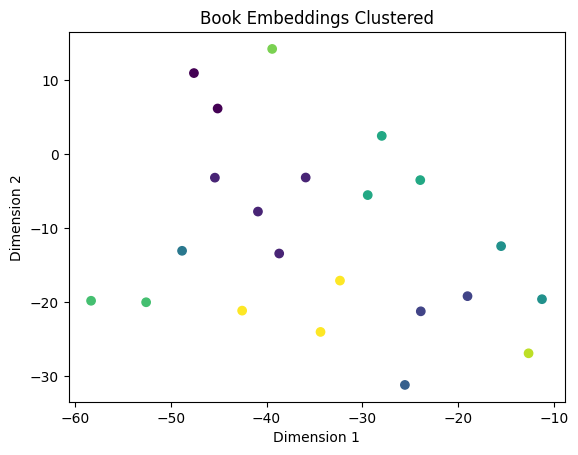

In [59]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action="ignore", category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Book Embeddings Clustered")
plt.show()

In [60]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)

    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [61]:
selected_indices = sorted(closest_indices)
selected_indices

[1, 2, 4, 5, 6, 8, 10, 12, 18, 20, 21]

In [62]:
llm3 = ChatOpenAI(temperature=0, max_tokens=1000, model="gpt-3.5-turbo")

In [63]:
map_prompt = """
You will be given a single passage of a contract. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [65]:
# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

map_chain = load_summarize_chain(
    llm=llm3, chain_type="stuff", prompt=map_prompt_template
)

In [67]:
selected_docs = [split_docs[doc] for doc in selected_indices]

In [68]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):
    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])

    # Append that summary to your list
    summary_list.append(chunk_summary)

    print(
        f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n"
    )

Summary #0 (chunk #1) - Preview: This passage provides information about various features and policies related to purchasing and using products from the Apple Stores. It begins by explaining the convenience of the 1-Click feature, which allows users to make purchases with a single c 

Summary #1 (chunk #2) - Preview: The passage explains the concept of Family Sharing, which allows up to six members of a family to share eligible iTunes, App Store, Mac App Store, and iBooks Store products. Family members can view and download each other's eligible products, but the 

Summary #2 (chunk #4) - Preview: This passage outlines the requirements and guidelines for using the iTunes Service. It states that in order to use the service, users must have compatible devices, internet access, and certain software. High-speed internet access is recommended, espe 

Summary #3 (chunk #5) - Preview: This passage provides information about the usage and limitations of Apple TV and iTunes Match. It states tha

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).


Summary #7 (chunk #12) - Preview: This passage outlines several important aspects of using the App Store and Mac App Store. Firstly, it explains that your device or computer will periodically check for updates to the apps on your device, and if available, these updates may automatica 

Summary #8 (chunk #18) - Preview: This passage outlines the scope of the license granted to the user for the Licensed Application. The license allows the user to use the application on Apple-branded products running iOS or Mac OS X that they own or control, as long as it is in compli 

Summary #9 (chunk #20) - Preview: This passage outlines the terms and conditions for using the Licensed Application and iBooks Store Products. It states that the Licensor has the right to warn, suspend, or terminate access to the External Services if there is a suspected violation of 

Summary #10 (chunk #21) - Preview: This passage discusses the ability to manually sync iBooks Store Products from an iTunes-authorised devi

In [69]:
from langchain.schema import Document

summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print(f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 3633 tokens


In [73]:
summaries.page_content

'This passage provides information about various features and policies related to purchasing and using products from the Apple Stores. It begins by explaining the convenience of the 1-Click feature, which allows users to make purchases with a single click on their computer or by tapping a button on their Apple-branded devices. When 1-Click is activated, the purchase is immediately downloaded and completed without any further steps.\n\nThe passage also discusses the terms and conditions for Gift Certificates, iTunes Cards and Codes, Content Codes, and Allowances. These items are not redeemable for cash, cannot be returned for a cash refund, and have restrictions on their use. They may only be redeemed in the United Kingdom and are not transferable. Additionally, iTunes is not responsible for lost or stolen gift certificates or codes.\n\nThe passage also includes important safety information, advising users to take breaks and rest if they experience any discomfort while using the product

In [75]:
summaries

Document(page_content='This passage provides information about various features and policies related to purchasing and using products from the Apple Stores. It begins by explaining the convenience of the 1-Click feature, which allows users to make purchases with a single click on their computer or by tapping a button on their Apple-branded devices. When 1-Click is activated, the purchase is immediately downloaded and completed without any further steps.\n\nThe passage also discusses the terms and conditions for Gift Certificates, iTunes Cards and Codes, Content Codes, and Allowances. These items are not redeemable for cash, cannot be returned for a cash refund, and have restrictions on their use. They may only be redeemed in the United Kingdom and are not transferable. Additionally, iTunes is not responsible for lost or stolen gift certificates or codes.\n\nThe passage also includes important safety information, advising users to take breaks and rest if they experience any discomfort w

In [74]:
summary_list

["This passage provides information about various features and policies related to purchasing and using products from the Apple Stores. It begins by explaining the convenience of the 1-Click feature, which allows users to make purchases with a single click on their computer or by tapping a button on their Apple-branded devices. When 1-Click is activated, the purchase is immediately downloaded and completed without any further steps.\n\nThe passage also discusses the terms and conditions for Gift Certificates, iTunes Cards and Codes, Content Codes, and Allowances. These items are not redeemable for cash, cannot be returned for a cash refund, and have restrictions on their use. They may only be redeemed in the United Kingdom and are not transferable. Additionally, iTunes is not responsible for lost or stolen gift certificates or codes.\n\nThe passage also includes important safety information, advising users to take breaks and rest if they experience any discomfort while using the produc

In [82]:
with open("vectors_summarized_2015.txt", "w") as f:
    f.write(summaries.page_content)

# 2023

In [83]:
llm.get_num_tokens(data_2023[0].page_content)

10281

In [99]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=750, chunk_overlap=0
)
split_docs = text_splitter.split_documents(data_2023)
len(split_docs)

17

In [100]:
embeddings = OpenAIEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in split_docs])

In [101]:
num_clusters = 15

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

In [102]:
vectors = np.array(vectors)

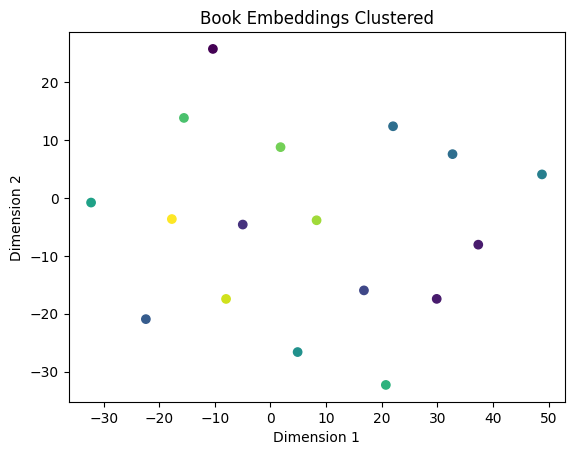

In [103]:
# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Book Embeddings Clustered")
plt.show()

In [104]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)

    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [105]:
selected_indices = sorted(closest_indices)
selected_indices

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16]

In [106]:
llm3 = ChatOpenAI(temperature=0, max_tokens=1000, model="gpt-3.5-turbo")

In [107]:
map_prompt = """
You will be given a single passage of a contract. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [108]:
# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

map_chain = load_summarize_chain(
    llm=llm3, chain_type="stuff", prompt=map_prompt_template
)

In [109]:
selected_docs = [split_docs[doc] for doc in selected_indices]

In [110]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):
    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])

    # Append that summary to your list
    summary_list.append(chunk_summary)

    print(
        f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n"
    )

Summary #0 (chunk #0) - Preview: This section of the Apple Media Services Terms and Conditions outlines the agreement between the user and Apple regarding the use of Apple's Services. The Services include various platforms such as the App Store, Apple Arcade, Apple Books, Apple Fitn 

Summary #1 (chunk #1) - Preview: This section of the contract discusses payment methods and the process for canceling an order. It states that if your primary payment method cannot be charged for any reason, Apple will attempt to charge your other eligible payment methods in order.  

Summary #2 (chunk #2) - Preview: This section of the contract outlines the terms and conditions for using Apple's Services and accessing your Content. It states that in order to use these services, you will need an Apple ID, which is the account used across Apple's ecosystem. It is  

Summary #3 (chunk #3) - Preview: This section of the contract outlines the terms and conditions for using digital content on Apple devices. Us

In [111]:
from langchain.schema import Document

summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print(f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 5087 tokens


In [112]:
with open("vectors_summarized_2023.txt", "w") as f:
    f.write(summaries.page_content)